In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
for dirname, _, filenames in os.walk('./input/NASA-bearing-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv


# Basic EDA

In [39]:
# Read the CSV file and set first column as the dataframe index
dataset = pd.read_csv("./input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv", index_col=0)
dataset.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.080905,0.078532,0.081356,0.047822
std,0.040171,0.011779,0.011596,0.009541
min,0.001168,0.000767,0.000716,0.001699
25%,0.060765,0.074233,0.076832,0.043950
50%,0.062007,0.075203,0.078197,0.044524
75%,0.083223,0.077456,0.080600,0.048111
max,0.453335,0.161016,0.151299,0.119047


In [40]:
dataset.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [41]:
# The last rows shows the bearing failure (acceleration -> 0) 
dataset.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


## Extract each bearing data and plot together the 4 signals

In [35]:
bearing1 = dataset['Bearing 1']
bearing1_index = bearing1.index.values
bearing2 = dataset['Bearing 2']
bearing2_index = bearing1.index.values
bearing3 = dataset['Bearing 3']
bearing3_index = bearing1.index.values
bearing4 = dataset['Bearing 4']
bearing4_index = bearing1.index.values

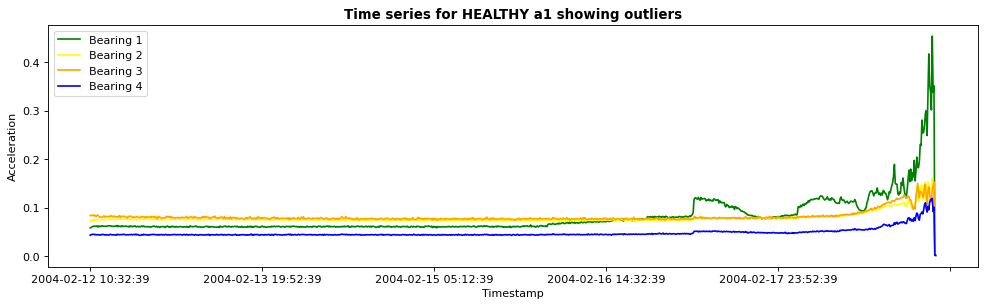

In [37]:
figure(figsize=(15, 4), dpi=80)

bearing1.plot(color='green', label='Bearing 1')
bearing2.plot(color='yellow', label='Bearing 2')
bearing3.plot(color='orange', label='Bearing 3')
bearing4.plot(color='blue', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for HEALTHY a1 showing outliers', fontweight ="bold")
plt.show()

# Normalize the dataset

In [47]:
from sklearn import preprocessing

# Dataset is scaled so that maximum for every column is 1
scaler = preprocessing.MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), 
                              columns=dataset.columns, 
                              index=dataset.index)
dataset_scaled.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.176344,0.485273,0.535517,0.393047
std,0.088842,0.073507,0.077007,0.081305
min,0.000000,0.000000,0.000000,0.000000
25%,0.131803,0.458450,0.505473,0.360049
50%,0.134550,0.464499,0.514541,0.364941
75%,0.181470,0.478561,0.530498,0.395511
max,1.000000,1.000000,1.000000,1.000000


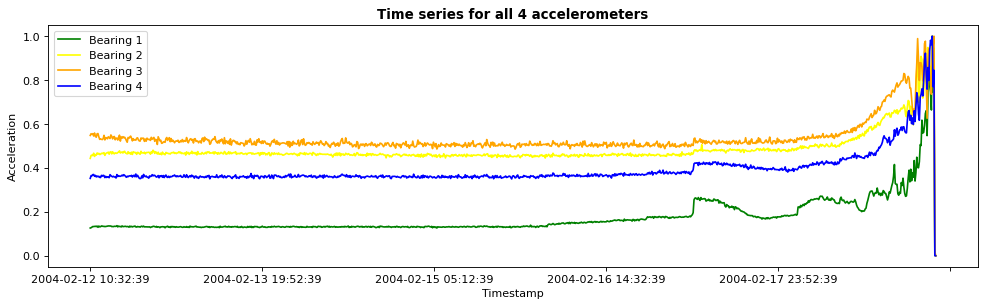

In [55]:
# Let's plot the dataset again
bearing1 = dataset_scaled['Bearing 1']
bearing1_index = bearing1.index.values
bearing2 = dataset_scaled['Bearing 2']
bearing2_index = bearing1.index.values
bearing3 = dataset_scaled['Bearing 3']
bearing3_index = bearing1.index.values
bearing4 = dataset_scaled['Bearing 4']
bearing4_index = bearing1.index.values

figure(figsize=(15, 4), dpi=80)

bearing1.plot(color='green', label='Bearing 1')
bearing2.plot(color='yellow', label='Bearing 2')
bearing3.plot(color='orange', label='Bearing 3')
bearing4.plot(color='blue', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for all 4 accelerometers', fontweight ="bold")
plt.show()

# PCA model: Principal Components analysis
Apply dimensionality reduction to deal with only 2 signals

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
dataset_PCA = pca.fit_transform(dataset_scaled)
dataset_PCA = pd.DataFrame(dataset_PCA)
dataset_PCA.index = dataset_scaled.index
dataset_PCA.columns = ['Dimension 1', 'Dimension 2']
dataset_PCA.head()

,Dimension 1,Dimension 2
2004-02-12 10:32:39,-0.061765,-0.035275
2004-02-12 10:42:39,-0.044440,-0.041943
2004-02-12 10:52:39,-0.044318,-0.038321
2004-02-12 11:02:39,-0.039493,-0.037457
2004-02-12 11:12:39,-0.039354,-0.033786


In [62]:
# Normalize PCA data
dataset_PCA = pd.DataFrame(scaler.fit_transform(dataset_PCA), 
                              columns=dataset_PCA.columns, 
                              index=dataset_PCA.index)
dataset_PCA.describe()

,Dimension 1,Dimension 2
count,984.000000,984.000000
mean,0.397396,0.409765
std,0.079498,0.070023
min,0.000000,0.000000
25%,0.364658,0.377479
50%,0.370713,0.398851
75%,0.394487,0.437157
max,1.000000,1.000000


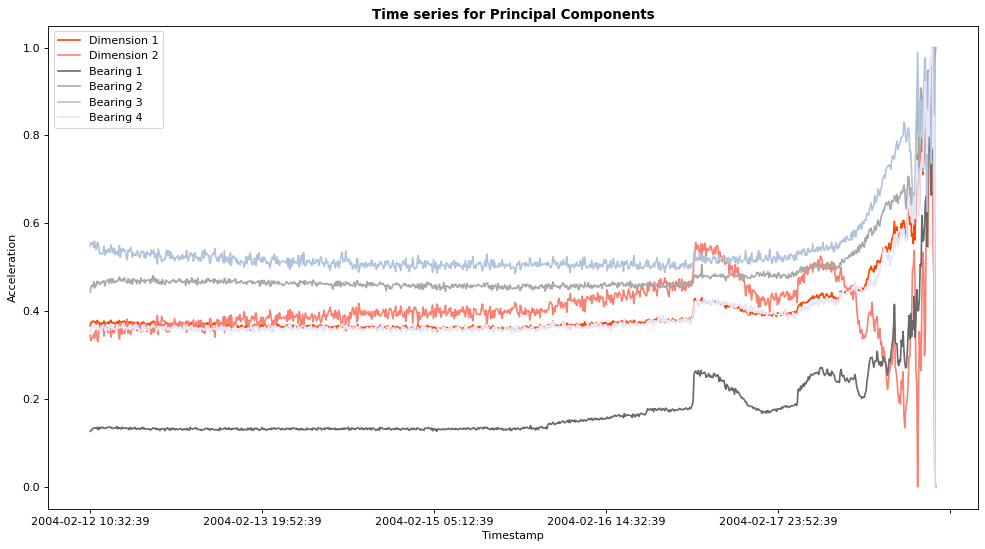

In [65]:
# Let's plot the Principal Components
dimension1 = dataset_PCA['Dimension 1']
dimension1_index = dimension1.index.values
dimension2 = dataset_PCA['Dimension 2']
dimension2_index = dimension2.index.values


figure(figsize=(15, 8), dpi=80)

dimension1.plot(color='orangered', label='Dimension 1')
dimension2.plot(color='salmon', label='Dimension 2')
bearing1.plot(color='dimgray', label='Bearing 1')
bearing2.plot(color='darkgray', label='Bearing 2')
bearing3.plot(color='lightsteelblue', label='Bearing 3')
bearing4.plot(color='lavender', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for Principal Components', fontweight ="bold")
plt.show()

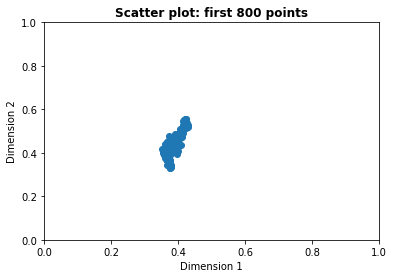

In [101]:
# VISUALIZE THE DATA IN THE PCA DIMENSIONAL SPACE
# Transform dataframe columns to np arrays
sample_size = 800
#sample_size = dimension1.shape[0] # =984
dim1_arr = np.array(dimension1)[:sample_size]
dim2_arr = np.array(dimension2)[:sample_size]
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: first 800 points', fontweight ="bold")
plt.show()

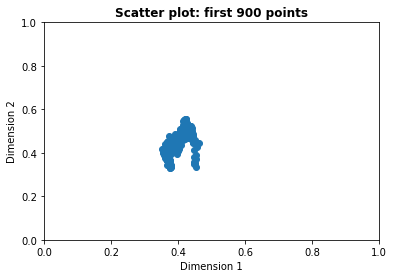

In [102]:
# Look at how the points are spreading in the index range 800-900
sample_size = 900
dim1_arr = np.array(dimension1)[:sample_size]
dim2_arr = np.array(dimension2)[:sample_size]
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: first 900 points', fontweight ="bold")
plt.show()

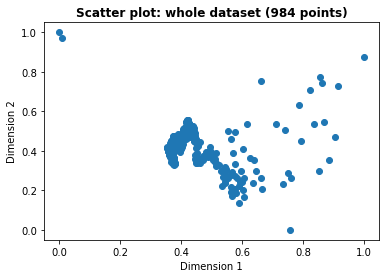

In [103]:
# Whole data (984 points)
# You can see how the dots are spreaded when approaching the bearing failure
dim1_arr = np.array(dimension1)
dim2_arr = np.array(dimension2)
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: whole dataset (984 points)', fontweight ="bold")
plt.show()